In [3]:
import xarray as xr
import glob
#
path = '../data/target_storage/'
file_names_1 = glob.glob(path+'*.nc')
ds1 = xr.merge([xr.open_dataset(f) for f in file_names_1])
#
path = '../data/abs_inj/'
file_names_2 = glob.glob(path+'*.nc')
ds2 = xr.merge([xr.open_dataset(f) for f in file_names_2])
#
ds = xr.merge([ds1,ds2])
print(ds)
#ds.to_netcdf('../data/WM.nc')


<xarray.Dataset>
Dimensions:          (time: 40, n: 16)
Coordinates:
  * time             (time) datetime64[ns] 2013-06-01 2013-06-02 ... 2013-07-10
Dimensions without coordinates: n
Data variables: (12/738)
    Volume_03_20_29  (time, n) float64 ...
    column_name      (n) object 'R1' 'R2' 'R3' 'R4' ... 'R13' 'R14' 'R15' 'R16'
    ID               (n) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
    Volume_02_20_29  (time, n) float64 ...
    Volume_16_15_27  (time, n) float64 ...
    Volume_16_19_30  (time, n) float64 ...
    ...               ...
    Volume_17_15_30  (time, n) float64 ...
    Volume_16_19_27  (time, n) float64 ...
    Volume_16_15_30  (time, n) float64 ...
    Volume_17_18_29  (time, n) float64 ...
    Volume_16_18_29  (time, n) float64 ...
    abs_inj          (time, n) float64 ...
Attributes:
    Conventions:  CF-1.6
    Author:       The data were written by  
    License:       
    History:      Created Thu Nov  4 00:14:19 2021
    Source:       Case:  ; remapp

In [4]:
# ds = xr.open_dataset('../data/WM.nc')
# print(ds)

ds['Volume'] = ds['Volume_00_16_30'] 
print(ds)
ds.to_netcdf('../data/WM.nc',encoding={'Volume':{ '_FillValue': -9999},'abs_inj':{ '_FillValue': -9999}})



<xarray.Dataset>
Dimensions:          (time: 40, n: 16)
Coordinates:
  * time             (time) datetime64[ns] 2013-06-01 2013-06-02 ... 2013-07-10
Dimensions without coordinates: n
Data variables: (12/739)
    Volume_03_20_29  (time, n) float64 ...
    column_name      (n) object 'R1' 'R2' 'R3' 'R4' ... 'R13' 'R14' 'R15' 'R16'
    ID               (n) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
    Volume_02_20_29  (time, n) float64 ...
    Volume_16_15_27  (time, n) float64 ...
    Volume_16_19_30  (time, n) float64 ...
    ...               ...
    Volume_16_19_27  (time, n) float64 ...
    Volume_16_15_30  (time, n) float64 ...
    Volume_17_18_29  (time, n) float64 ...
    Volume_16_18_29  (time, n) float64 ...
    abs_inj          (time, n) float64 ...
    Volume           (time, n) float64 ...
Attributes:
    Conventions:  CF-1.6
    Author:       The data were written by  
    License:       
    History:      Created Thu Nov  4 00:14:19 2021
    Source:       Case:  ; remapp

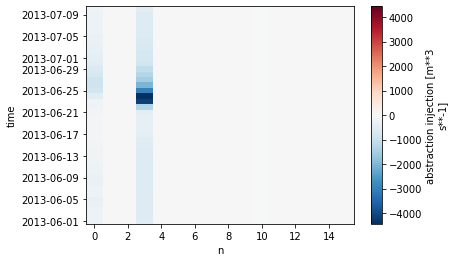

In [5]:
ds.abs_inj.plot()

In [6]:
import netCDF4 as nc4

ncid = nc4.Dataset('../data/WM.nc')
# ncid = nc4.Dataset('../data/forcing/forcing.nc')
# print(ncid)
#print(ncid['Precipitation'])
print(ncid['abs_inj'])


<class 'netCDF4._netCDF4.Variable'>
float64 abs_inj(time, n)
    _FillValue: -9999.0
    long_name: abstraction injection
    units: m**3 s**-1
unlimited dimensions: 
current shape = (40, 16)
filling on


In [7]:
import netCDF4 as nc4

ncid = nc4.Dataset('/Users/shg096/Downloads/hybrid_test.mizuRoute.h.2013-06-01-00000.nc')
# ncid = nc4.Dataset('../data/forcing/forcing.nc')
print(ncid)
#print(ncid['Precipitation'])
print(ncid['IRFroutedRunoff'])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    dimensions(sizes): time(40), seg(16), hru(16), ens(1)
    variables(dimensions): float32 time(time), int32 basinID(hru), int32 reachID(seg), float32 basRunoff(time, hru), float32 instRunoff(time, seg), float32 dlayRunoff(time, seg), float32 sumUpstreamRunoff(time, seg), float32 IRFroutedRunoff(time, seg), float32 IRFlakeVol(time, seg)
    groups: 
<class 'netCDF4._netCDF4.Variable'>
float32 IRFroutedRunoff(time, seg)
    long_name: IRF routed runoff in each reach
    units: m3/s
unlimited dimensions: time
current shape = (40, 16)
filling on, default _FillValue of 9.969209968386869e+36 used


<xarray.Dataset>
Dimensions:            (time: 40, hru: 16, seg: 16)
Coordinates:
  * time               (time) datetime64[ns] 2013-06-01 ... 2013-07-10
Dimensions without coordinates: hru, seg
Data variables:
    basinID            (hru) int32 ...
    reachID            (seg) int32 ...
    basRunoff          (time, hru) float32 ...
    instRunoff         (time, seg) float32 ...
    dlayRunoff         (time, seg) float32 ...
    sumUpstreamRunoff  (time, seg) float32 ...
    IRFroutedRunoff    (time, seg) float32 ...
    IRFlakeVol         (time, seg) float32 ...


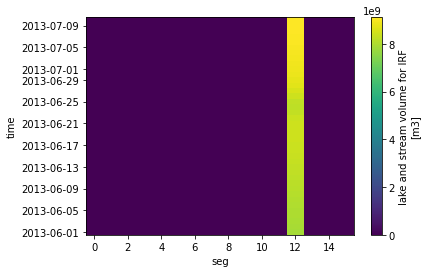

In [8]:
import xarray as xr

ds = xr.open_dataset('/Users/shg096/Downloads/hybrid_test.mizuRoute.h.2013-06-01-00000.nc')

print(ds)

ds.IRFlakeVol.plot()


Text(0, 0.5, 'Storage of \n lake Diefenbaker [m3]')

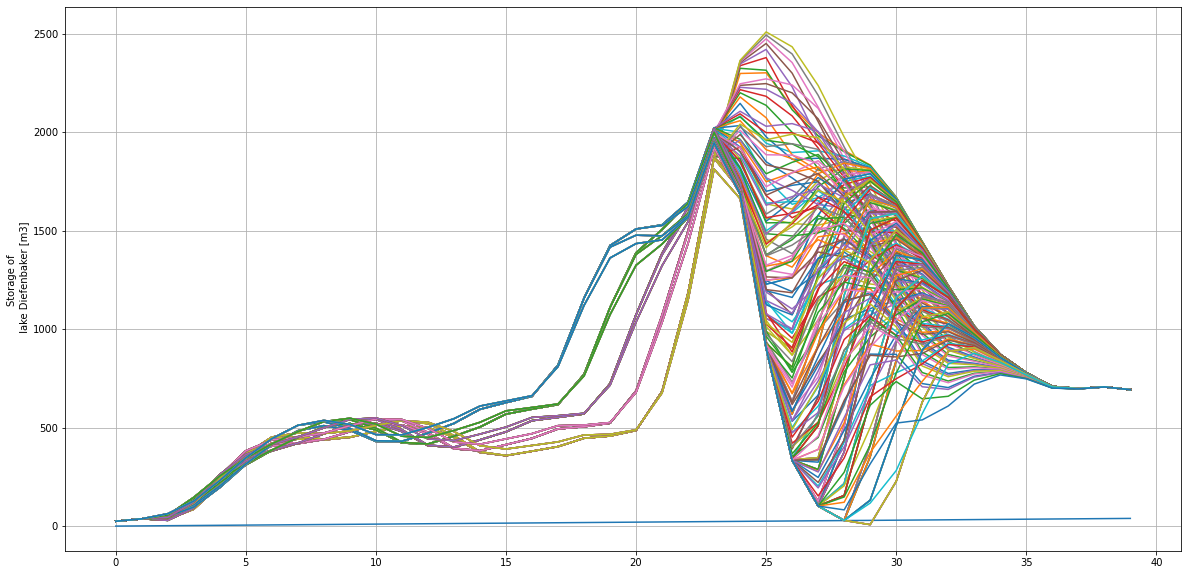

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/shg096/Downloads/final_ensemble.csv')



# plotting
df.plot(figsize=(20,10))
plt.grid(which='both')
plt.gca().get_legend().remove()
plt.ylabel('Storage of \n lake Diefenbaker [m3]')

